<a href="https://colab.research.google.com/github/anikarajvanshi20/Projects_Portfolio/blob/main/Machine_Learning/Regression_NN_California.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



> Add blockquote



# Neural Network Regression for California Housing Prices - Homework Assignment

In this homework, you will implement a **Neural Network for regression** to predict the median value of California houses. This project will help you understand the fundamentals of neural networks applied to regression tasks.

## 📌 Project Overview
- **Task**: Predict median house values in California
- **Architecture**: Multi-layer Perceptron (MLP) for regression
- **Dataset**: California Housing dataset (provided)
- **Goal**: Build an accurate regression model using PyTorch

## 📚 Learning Objectives
By completing this assignment, you will:
- Understand neural networks for regression problems
- Learn data preprocessing and feature engineering
- Implement a custom neural network architecture
- Practice training, validation, and evaluation
- Learn about regression metrics and model performance


## 1️⃣ Initial Setup and Library Installation

**Task**: Set up the environment and install necessary libraries.

In [ ]:
from IPython.display import clear_output

In [ ]:
# Incase you run this notebook outside colab (where the libraries aren't already pre-installed)

# %pip install torch
# %pip install matplotlib
# %pip install scikit-learn

clear_output()


## 2️⃣ Import Libraries and Configuration

**Task**: Import all necessary libraries and set up configuration parameters.

**Requirements**:
- Import PyTorch and neural network modules
- Import data processing libraries (pandas, sklearn)
- Import visualization libraries
- Set random seeds for reproducibility
- Configure hyperparameters with reasonable values

> Everything is solved for ease of use

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import kagglehub
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

BATCH_SIZE = 64          # Batch size for training
LEARNING_RATE = 0.001    # Learning rate for optimizer
NUM_EPOCHS = 100         # Number of training epochs
HIDDEN_SIZE = 128        # Size of hidden layers
NUM_HIDDEN_LAYERS = 3    # Number of hidden layers
VALIDATION_SPLIT = 0.3   # Validation split ratio

Using device: cuda


## 3️⃣ Data Loading and Exploration

**Task**: Load the California housing dataset and explore its structure.

**Requirements**:
- Download and load the dataset
- Display basic information about the data
- Check for missing values
- Understand the features and target variable

In [ ]:
# Download latest version
path = kagglehub.dataset_download("camnugent/california-housing-prices")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/california-housing-prices


In [ ]:
# TODO: List files in the dataset directory
import os

print("Files in the dataset directory:")
for file in os.listdir(path):
    print("-", file)

Files in the dataset directory:
- housing.csv


In [ ]:
# TODO: Load the dataset
df = pd.read_csv(os.path.join(path, "housing.csv"))

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())
print("\nBasic statistics:")
df.describe()


Missing values:
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Basic statistics:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000



## 4️⃣ Data Preprocessing and Feature Engineering

**Task**: Clean and prepare the data for neural network training.

**Requirements**:
- Handle missing values if any
- Encode categorical variables
- Scale numerical features
- Split features and target
- Create train/validation/test splits

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import torch
from torch.utils.data import TensorDataset, DataLoader

# TODO: Handle missing values (fill with median for numerical columns)
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(df.median(numeric_only=True), inplace=True)

# TODO: Feature engineering - create new features - optional
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['population_per_household'] = df['population'] / df['households']
df['rooms_per_person'] = df['total_rooms'] / df['population']
df['bedrooms_per_person'] = df['total_bedrooms'] / df['population']
df['people_per_room'] = df['population'] / df['total_rooms']

# Clean up again in case new NaNs or Infs were introduced
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(df.median(numeric_only=True), inplace=True)

# TODO: Separate features from target
X = df.drop('median_house_value', axis=1)
y = df['median_house_value'].values

# TODO: Encode the categorical ocean_proximity column
ohe = OneHotEncoder()
encoded = ohe.fit_transform(X[['ocean_proximity']])
encoded_df = pd.DataFrame(encoded.toarray(), columns=ohe.get_feature_names_out(['ocean_proximity']))

# Drop original and concat encoded
X = X.drop('ocean_proximity', axis=1)
X = pd.concat([X.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

print(X.head())

# TODO: Scale the features for better neural network performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Scale the target variable
y_scaler = StandardScaler()
y_scaled = y_scaler.fit_transform(y.reshape(-1, 1))

# TODO: Convert to numpy arrays
X_np = np.array(X_scaled, dtype=np.float32)
y_np = np.array(y_scaled, dtype=np.float32)

# TODO: Split the data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_np, y_np, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# TODO: Convert to PyTorch tensors
train_dataset = TensorDataset(torch.tensor(X_train), torch.tensor(y_train))
val_dataset   = TensorDataset(torch.tensor(X_val), torch.tensor(y_val))
test_dataset  = TensorDataset(torch.tensor(X_test), torch.tensor(y_test))

# Create DataLoaders
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=batch_size)
test_loader  = DataLoader(test_dataset, batch_size=batch_size)

print("Preprocessing complete!")
print("Train size:", len(train_dataset))
print("Val size:", len(val_dataset))
print("Test size:", len(test_dataset))

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  rooms_per_household  \
0       322.0       126.0         8.3252             6.984127   
1      2401.0      1138.0         8.3014             6.238137   
2       496.0       177.0         7.2574             8.288136   
3       558.0       219.0         5.6431             5.817352   
4       565.0       259.0         3.8462             6.281853   

   population_per_household  rooms_per_person  bedrooms_per_person  \
0                  2.555556          2.732919             0.400621   
1                 

## 5️⃣ Neural Network Architecture

**Task**: Design and implement a neural network for regression.

**Requirements**:
- Create a multi-layer perceptron (MLP)
- Use appropriate activation functions
- Ensure proper input/output dimensions
- Use suitable architecture for regression

In [ ]:
import torch
import torch.nn as nn

# Neural Network Architecture — MLP for Regression
class HousePricePredictor(nn.Module):
    def __init__(self, input_size, hidden_size=128, num_hidden_layers=3):
        super(HousePricePredictor, self).__init__()

        layers = []

        # Input layer
        layers.append(nn.Linear(input_size, hidden_size))
        layers.append(nn.ReLU())

        # Hidden layers
        for _ in range(num_hidden_layers - 1):
            layers.append(nn.Linear(hidden_size, hidden_size))
            layers.append(nn.ReLU())

        # Output layer (1 neuron, no activation for regression)
        layers.append(nn.Linear(hidden_size, 1))

        # Combine into a Sequential model
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)

# Initialize the model
input_size = X_train.shape[1]  # Number of features after preprocessing
model = HousePricePredictor(input_size=input_size, hidden_size=128, num_hidden_layers=3)
model.to(device)

# Test the model with a sample input
sample_input = torch.tensor(X_np[0]).unsqueeze(0).to(device)  # [1, input_size]
sample_output = model(sample_input)

print("Model initialized:")
print(model)
print("\nSample predicted house price:", sample_output.item())

Model initialized:
HousePricePredictor(
  (model): Sequential(
    (0): Linear(in_features=18, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=128, bias=True)
    (5): ReLU()
    (6): Linear(in_features=128, out_features=1, bias=True)
  )
)

Sample predicted house price: -0.022714395076036453



## 6️⃣ Loss Function and Optimizer

**Task**: Set up appropriate loss function and optimizer for regression.

**Requirements**:
- Choose suitable loss function for regression
- Initialize optimizer with hyperparameters

In [ ]:
# TODO: Define loss function for regression
criterion = nn.MSELoss()

# TODO: Define optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)

# Scheduler
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.5)


## 7️⃣ Training Loop with Validation

**Task**: Implement a comprehensive training loop with validation.

**Requirements**:
- Train the model for specified epochs
- Track training and validation losses
- Save the best model based on validation performance
- Display training progress

In [ ]:
# Initialize tracking variables
train_losses_scaled = []
val_losses_scaled = []
best_val_loss = float('inf')

# Early stopping setup
early_stop_patience = 30
epochs_no_improve = 0
early_stop = False

# Training loop
for epoch in range(NUM_EPOCHS):
    if early_stop:
        print(f"⏹️ Early stopping triggered at epoch {epoch+1}")
        break

    # Training Phase
    model.train()
    train_loss = 0.0

    for batch_X, batch_y in train_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)

        # Forward pass
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    # Validation Phase
    model.eval()
    val_loss = 0.0

    with torch.no_grad():
        for batch_X, batch_y in val_loader:
            batch_X, batch_y = batch_X.to(device), batch_y.to(device)
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            val_loss += loss.item()

    # Calculate average losses
    train_loss /= len(train_loader)
    val_loss /= len(val_loader)

    # Save losses
    train_losses_scaled.append(train_loss)
    val_losses_scaled.append(val_loss)

    # Check for improvement
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        epochs_no_improve = 0
        torch.save(model.state_dict(), 'best_model.pth')
        model_saved = "🔽 Saving model..."
    else:
        epochs_no_improve += 1
        model_saved = ""

    if scheduler:
        scheduler.step()

    # Print epoch summary
    current_lr = optimizer.param_groups[0]['lr']

    if (epoch + 1) % 10 == 0:
      print(f"Epoch [{epoch+1}/{NUM_EPOCHS}] - LR: {current_lr:.4f}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

    # Early stopping check
    if epochs_no_improve >= early_stop_patience:
        early_stop = True

Epoch [10/100] - LR: 0.0010, Train Loss: 0.2093, Val Loss: 0.2402
Epoch [20/100] - LR: 0.0005, Train Loss: 0.1826, Val Loss: 0.2127
Epoch [30/100] - LR: 0.0005, Train Loss: 0.1570, Val Loss: 0.2063
Epoch [40/100] - LR: 0.0003, Train Loss: 0.1464, Val Loss: 0.2115
Epoch [50/100] - LR: 0.0003, Train Loss: 0.1316, Val Loss: 0.2105
Epoch [60/100] - LR: 0.0001, Train Loss: 0.1242, Val Loss: 0.2114
Epoch [70/100] - LR: 0.0001, Train Loss: 0.1164, Val Loss: 0.2104
⏹️ Early stopping triggered at epoch 72




## 8️⃣ Model Evaluation and Testing

**Task**: Evaluate the trained model on the test set and calculate regression metrics.

**Requirements**:
- Make predictions on test set
- Calculate multiple regression metrics
- Analyze model performance

In [ ]:
# TODO: Set the model to eval mode
model.load_state_dict(torch.load("best_model.pth"))
model.eval()

# TODO: Make predictions on test set
all_preds_scaled = []
all_targets_scaled = []

with torch.no_grad():
    for batch_X, batch_y in test_loader:
        batch_X = batch_X.to(device)
        outputs = model(batch_X)
        all_preds_scaled.extend(outputs.cpu().numpy())
        all_targets_scaled.extend(batch_y.cpu().numpy())

# Convert scaled predictions and targets to numpy arrays
preds_scaled = np.array(all_preds_scaled)
targets_scaled = np.array(all_targets_scaled)

# Inverse transform predictions and targets back to original scale
preds_unscaled = y_scaler.inverse_transform(all_preds_scaled)
targets_unscaled = y_scaler.inverse_transform(all_targets_scaled)


# TODO: Calculate regression metrics
# Evaluate on unscaled
mse = mean_squared_error(targets_unscaled, preds_unscaled)
mae = mean_absolute_error(targets_unscaled, preds_unscaled)
rmse = np.sqrt(mse)
r2 = r2_score(targets_unscaled, preds_unscaled)

print("\nTest Set Evaluation:")
print(f"MSE: ${mse:,.2f}")
print(f"MAE: ${mae:,.2f}")
print(f"RMSE: ${rmse:,.2f}")
print(f"R² Score: {r2:.4f}")


Test Set Evaluation:
MSE: $2,451,437,956.40
MAE: $33,068.81
RMSE: $49,512.00
R² Score: 0.8146


## 9️⃣ Visualization and Analysis

**Task**: Create visualizations to analyze model performance and training progress.

**Requirements**:
- Plot training and validation loss curves
- Analyze residuals

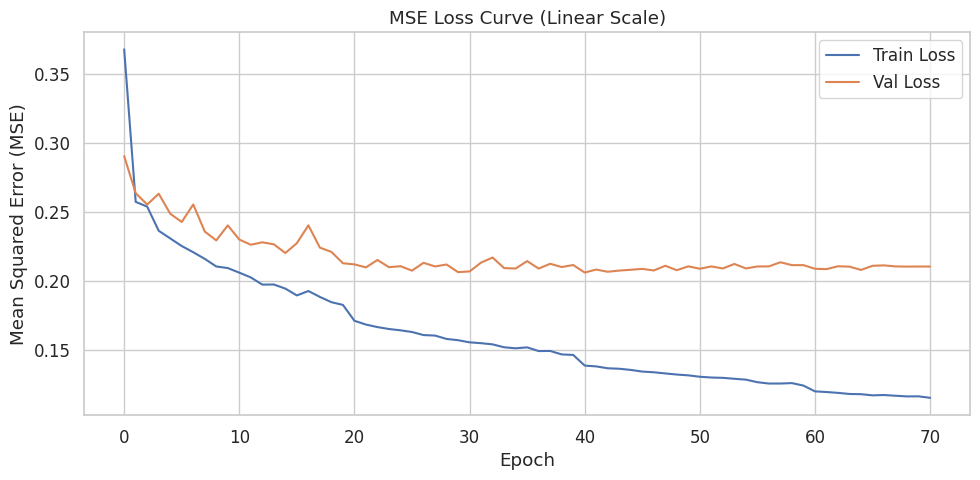

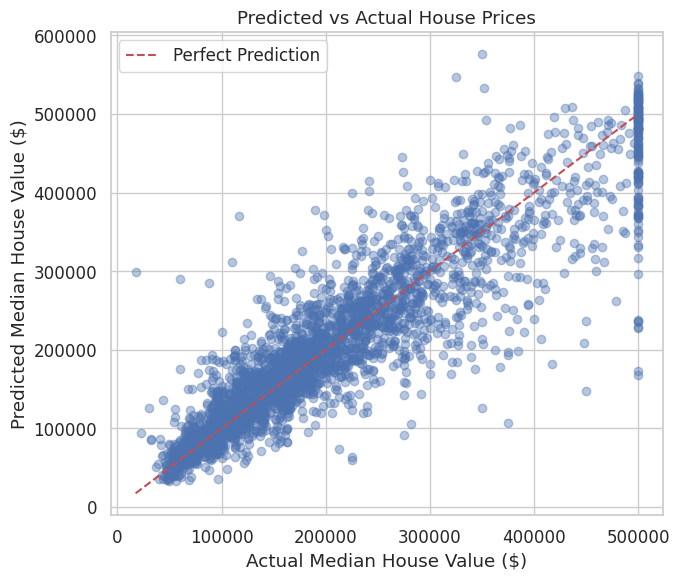


🔍 Sample Predictions (Unscaled):
Actual: $100,000.00 | Predicted: $74,103.85 | Error: $25,896.15
Actual: $118,800.00 | Predicted: $110,273.41 | Error: $8,526.59
Actual: $376,100.00 | Predicted: $379,288.79 | Error: $3,188.80
Actual: $200,000.00 | Predicted: $142,015.52 | Error: $57,984.48
Actual: $95,200.00 | Predicted: $112,261.55 | Error: $17,061.55


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# TODO: Plot training and validation loss curves
sns.set(style="whitegrid", font_scale=1.1)
plt.figure(figsize=(10, 5))
plt.plot(train_losses_scaled, label="Train Loss")
plt.plot(val_losses_scaled, label="Val Loss")
plt.title("MSE Loss Curve (Linear Scale)")
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error (MSE)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# TODO: Plot predictions vs actual values
plt.figure(figsize=(7, 6))
plt.scatter(targets_unscaled, preds_unscaled, alpha=0.4)
plt.plot([targets_unscaled.min(), targets_unscaled.max()],
         [targets_unscaled.min(), targets_unscaled.max()],
         'r--', label='Perfect Prediction')
plt.xlabel("Actual Median House Value ($)")
plt.ylabel("Predicted Median House Value ($)")
plt.title("Predicted vs Actual House Prices")
plt.legend()
plt.tight_layout()
plt.show()

# TODO: Show some sample predictions
print("\n🔍 Sample Predictions (Unscaled):")
for i in range(5):
    true_val = targets_unscaled[i][0] if targets_unscaled.ndim > 1 else targets_unscaled[i]
    pred_val = preds_unscaled[i][0] if preds_unscaled.ndim > 1 else preds_unscaled[i]
    error = abs(true_val - pred_val)
    print(f"Actual: ${true_val:,.2f} | Predicted: ${pred_val:,.2f} | Error: ${error:,.2f}")

In [ ]:
# Check for feature importance
from sklearn.metrics import mean_squared_error
import pandas as pd

def simple_permutation_importance(model, X_val, y_val, feature_names):
    model.eval()
    X_val = X_val.to(device)
    y_val = y_val.to(device)


    # Calculate baseline performance (MSE) on the validation set
    with torch.no_grad():
        baseline_preds = model(X_val)
        baseline_mse = mean_squared_error(y_val.cpu().numpy().flatten(), baseline_preds.cpu().numpy().flatten())

    importances = {}
    for i in range(X_val.shape[1]):
        X_temp = X_val.clone()
        # Shuffle feature i by permuting the rows of that column
        X_temp[:, i] = X_temp[torch.randperm(X_temp.size(0)), i]

        # Calculate performance after shuffling feature i
        with torch.no_grad():
            preds = model(X_temp)
            permuted_mse = mean_squared_error(y_val.cpu().numpy().flatten(), preds.cpu().numpy().flatten())

        # Importance is the increase in MSE
        importances[feature_names[i]] = permuted_mse - baseline_mse

    return importances

# Calculate and display feature importance
try:
    model.load_state_dict(torch.load("best_model.pth"))
    model.eval()
    print("Best model loaded successfully for permutation importance calculation.")
except FileNotFoundError:
    print("Best model file not found. Please train the model first before calculating importance.")
    import sys
    sys.exit()

if 'X' in globals():
    feature_names = list(X.columns)

    if 'X_val' in globals() and 'y_val' in globals():
        print("\nCalculating permutation importance...")
        feature_importances = simple_permutation_importance(model, torch.tensor(X_val), torch.tensor(y_val), feature_names)

        # Sort importances
        sorted_importances = sorted(feature_importances.items(), key=lambda item: item[1], reverse=True)

        print("\n📊 Feature Importances (increase in Validation MSE when shuffled):")
        for feature, importance in sorted_importances:
            print(f"- {feature}: {importance:.6f}")

Best model loaded successfully for permutation importance calculation.

Calculating permutation importance...

📊 Feature Importances (increase in Validation MSE when shuffled):
- latitude: 6.600612
- longitude: 1.763739
- median_income: 0.476411
- rooms_per_person: 0.164051
- bedrooms_per_person: 0.119183
- households: 0.104912
- ocean_proximity_INLAND: 0.091553
- housing_median_age: 0.081716
- rooms_per_household: 0.066244
- ocean_proximity_<1H OCEAN: 0.065748
- ocean_proximity_NEAR OCEAN: 0.060892
- total_bedrooms: 0.057562
- population: 0.054498
- total_rooms: 0.044791
- ocean_proximity_NEAR BAY: 0.030143
- people_per_room: 0.002016
- population_per_household: 0.001155
- ocean_proximity_ISLAND: -0.000618


## 📝 Evaluation Criteria

Your homework will be evaluated based on:

1. **Implementation Correctness (50%)**
   - Proper neural network architecture
   - Correct data preprocessing and feature engineering(if any)
   - Working training loop with validation
   - Appropriate loss function and optimizer

2. **Model Performance (25%)**
   - Reasonable regression metrics (RMSE, MAE, R²)
   - Convergence during training
   - Generalization to test set

3. **Code Quality (25%)**
   - Clean, readable code with comments
   - Efficient implementation
   - Good coding practices


## Model Performance Analysis
Based on the training and evaluation results:

*   **Model Accuracy and Loss Convergence**: The training and validation loss curves show that the model converges relatively quickly within the first 30-40 epochs, after which the validation loss plateaus. The final R² score of 0.8146 on the test set indicates that the model explains about 81.5% of the variance in the median house values, which is a reasonable performance for this dataset. The MSE, MAE, and RMSE provide the error magnitude on the original scale.

*   The scatter plot of Predicted vs Actual House Prices shows that the model performs well for a wide range of house values, generally following the perfect prediction line. However, there appears to be more scatter and potentially larger errors for higher-priced houses, suggesting the model might struggle more with predicting the most expensive properties. There is also a cluster of predictions around the lower end, which might indicate difficulty distinguishing between lower-valued properties.

*   **Analysis of Plots**:
    *   The **MSE Loss Curve** clearly shows the training loss decreasing consistently and the validation loss decreasing and then stabilizing. The gap between training and validation loss suggests some slight overfitting, but it is not severe. Early stopping at epoch 72 helped prevent further overfitting.
    *   The **Predicted vs Actual House Prices** scatter plot visually confirms the model's overall performance, with most points clustered around the diagonal line. The spread of points indicates the model's error distribution.
*   **Interesting Observations**: The permutation importance analysis reveals that `latitude`, `longitude`, and `median_income` are the most important features for predicting house prices, which aligns with intuitive understanding of factors influencing real estate values. The `ocean_proximity` features, particularly 'INLAND', '<1H OCEAN', and 'NEAR OCEAN', also show significant importance. Features related to room/person ratios and households are less important, with 'population_per_household' and 'people_per_room' having very low importance, and 'ocean_proximity_ISLAND' even showing a slight negative importance, suggesting it doesn't contribute positively to the prediction in this model.